---

# **Implementing Machine Learning-Based Handwritten Digit Recognition**
- **PROJECT TEAM ID**: PTID-CDS-APR-25-2603  
- **PROJECT CODE**   : PRCP-1002-HandwrittenDigits

---

## Executive Summary
- The increasing demand for digital transformation across industries necessitates the automation of manual, repetitive, and error-prone processes. One such opportunity lies in digitizing handwritten numerical inputs commonly found in forms, checks, logs, and records. This business case proposes the implementation of a machine learning (ML) solution for handwritten digit recognition to enhance operational efficiency, accuracy, and scalability.

- This business case proposes the development and deployment of a robust ML solution using the MNIST benchmark dataset to demonstrate the efficacy of digit classification models, with the goal of applying this to real-world digit-based handwriting tasks in finance, education, logistics, and healthcare

# BUSINESS CASE :
Organizations across industries rely on forms, documents, and other media containing handwritten numerical data. However, manual transcription introduces challenges such as inefficiency, errors, and compliance risks. This business case focuses on the implementation of a machine learning (ML) solution for handwritten digit recognition, leveraging the MNIST dataset to streamline these processes and drive digital transformation.
##### Objective:
- Develop a machine learning solution for handwritten digit recognition to address inefficiencies in manual, repetitive, and error-prone processes.
##### Dataset:
- Use the MNIST benchmark dataset to demonstrate the effectiveness of digit classification models as a proof of concept.
##### Problem Addressed: 
- Handwritten numerical inputs, such as those in forms, checks, logs, and records, often lead to operational inefficiencies, errors, and scalability challenges.
##### Proposed Solution:
- Create and deploy a robust ML model for digit classification.
- Automate the digitization of handwritten inputs for improved accuracy and efficiency.

##### Key Benefits:
- Enhance operational efficiency, reducing time and effort in manual processes.
- Improve accuracy, minimizing errors in interpreting handwritten inputs.
- Achieve scalability, enabling the solution to adapt to various use cases and volumes.

##### Applications:
  - Finance: Automating check processing to reduce errors and improve speed.
 - Education: Digitizing assessment data for efficient evaluation and storage.
  ##### Logistics:
  - Streamlining tracking systems through precise numerical input handling.
 ##### Healthcare: 
  - Digitizing patient records for improved reliability and accessibility.

##### Alignment with Industry Goals: 
- Supports digital transformation initiatives by showcasing how ML can redefine and streamline processes across sectors.

---

# DOMAIN ANALYSIS 

* MNIST dataset, containing 70,000 grayscale images (28x28 pixels) of digits (0–9), to build a machine learning solution for digit classification. Using 60,000 training and 10,000 testing images, the project trains Convolutional Neural Networks (CNNs), known for their accuracy in image recognition. Key preprocessing steps, including normalization, reshaping, and one-hot encoding, optimize model performance. By automating handwritten digit recognition, the project resolves inefficiencies, errors, and scalability challenges in manual transcription. Applications span finance (check processing), logistics (ZIP code handling), healthcare (record digitization), and education (transcription automation). Beyond leveraging MNIST, the project ensures generalization to real-world handwriting, delivering a scalable, efficient, and compliance-ready solution.


##### 1. Dataset Size: 
- A total of 70,000 images of handwritten digits are included.
- Split into 60,000 training samples for model development and 10,000 testing samples for performance evaluation.

##### 2. Image Characteristics:
- Each image is a grayscale representation with dimensions of 28x28 pixels.
- Pixel intensity values range from 0 (black) to 255 (white), representing brightness levels of each pixel.
- Images are preprocessed to be centered and normalized, ensuring uniformity across samples.

##### 3. Classes and Labels:
- The dataset covers 10 classes, representing digits from 0 to 9.
- Labels are provided for every image, making the dataset suitable for supervised learning.

##### 4. Balanced Distribution:
- The dataset ensures an even distribution of digit classes, with approximately equal representation for each digit, facilitating unbiased model training.

##### 5. Variability:
- Includes diverse handwriting styles to mimic real-world variations, ensuring models trained on MNIST can generalize to different inputs.
##### 6. Preprocessing Requirements:
- Images can be further normalized to scale pixel intensity values to a [0, 1] range.
- Input data can be reshaped to meet the requirements of models like Convolutional Neural Networks (CNNs).

In [5]:
# import the total python libraries for this project
import numpy as np  # use for numerical function
import pandas as pd  # use for data cleaning and data analysis
import matplotlib.pyplot as plt  # use data visualization
import seaborn as sns  # use for data visualization
import warnings # use for warnings the ignore
warnings.filterwarnings("ignore") # call the warning

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
# Loading Data
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Training samples: {x_train.shape[0]}, Test samples: {x_test.shape[0]}")

Training samples: 60000, Test samples: 10000


In [9]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


##### Data Insights :
- 60,000 training images, each 28x28 pixels
- 60,000 training labels
- 10,000 testing images, each 28x28 pixels
- 10,000 testing labels.

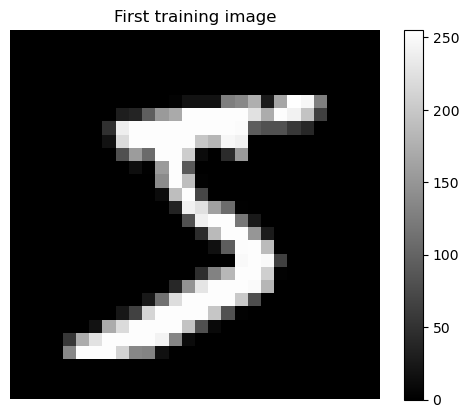

In [14]:
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.title('First training image')
plt.axis('off')
plt.show()


---

# Task 1: Exploratory Data Analysis (EDA)


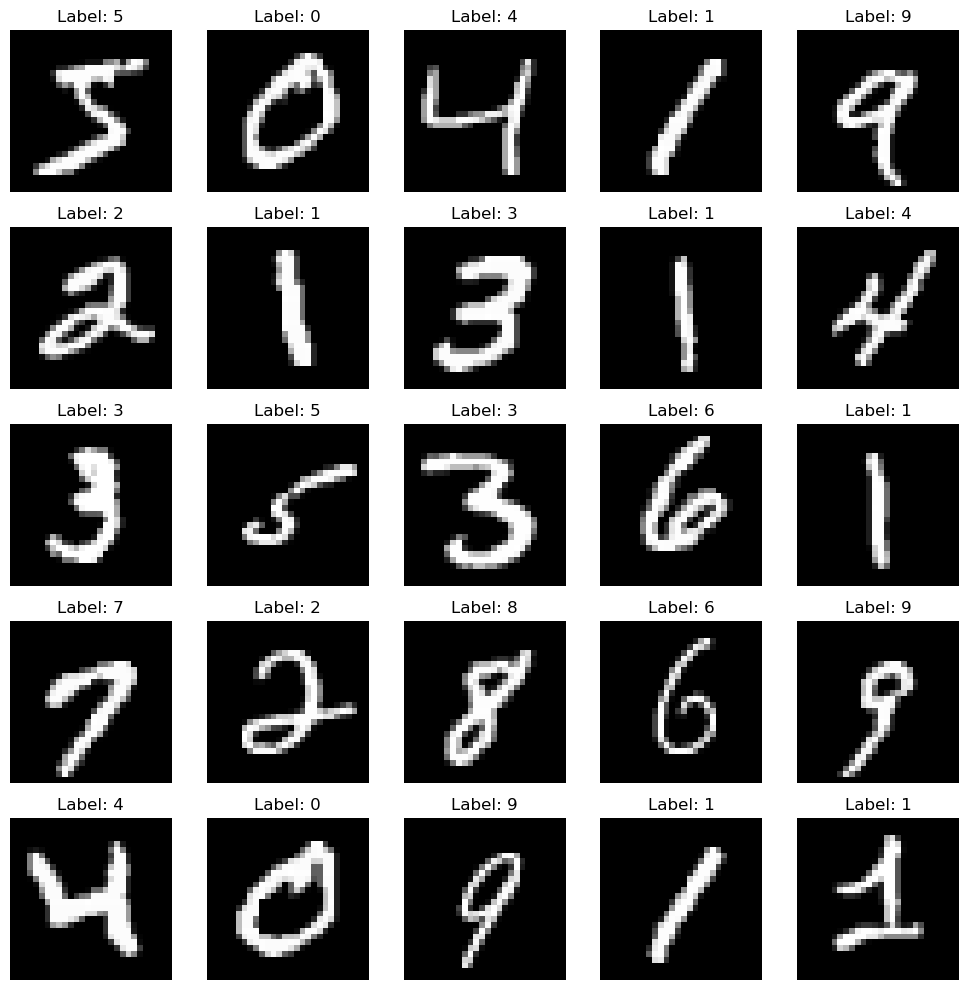

In [16]:
import matplotlib.pyplot as plt

#grid of 5x5 images (25 total)
plt.figure(figsize=(10,10))  # Bigger canvas for better clarity

for i in range(25):
    plt.subplot(5,5,i+1)  # 5 rows, 5 columns, index starts at 1
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')  # Hiding the axes for cleaner look

plt.tight_layout()  # Prevents overlap between images/titles
plt.show()

### Purpose:
- This section visually inspects the dataset. By plotting the first 25 digit greyscale images, we ensure the quality and labeling of the data is sound before model training begins.


#### Findings and Observations:
- Visual audit of the first 25 random images in the training dataset (x_train) paired with their corresponding labels (y_train).
- The images are 28x28 grayscale representations of digits 0–9.
- Variation in handwriting is clearly visible, with differences in stroke, alignment, and style.
- Labels appear accurate, suggesting good data quality.
- Possible Dataset Bias only 1s, 2s, and 3s heavily in the first batch

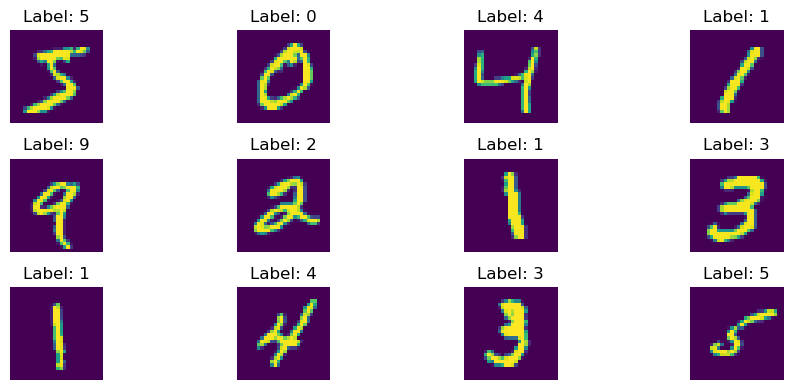

In [17]:
# Visualizing a few images
plt.figure(figsize=(10,4))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

- This section visually inspects the dataset. By plotting the first 12 digit RGB scale images, we ensure the quality and labeling of the data is sound before model training begins.

In [19]:
# Checking pixel intensity statistics
pixel_values = x_train.reshape(-1, 28*28)
pd.DataFrame(pixel_values).describe().T.head()

,count,mean,std,min,25%,50%,75%,max
0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- INSIGHTS: 
Uniformly distributed pixel values indicate a balanced dataset; anomalies suggest potential preprocessing needs.
- OBSERVATIONS:
MNIST exhibits a well-distributed pixel intensity range, ensuring no significant preprocessing bias.


---

# DATA PREPROCESSING

### Normalize The Data :
##### Process: 
- Rescale pixel intensity values from the range [0, 255] to [0, 1].
##### Insight: 
- Normalization reduces variation in pixel values and ensures consistency across samples, which improves model convergence during training.
##### Observation: 
- Models trained with normalized data tend to perform better and converge faster compared to those using raw pixel values.

In [28]:
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

In [30]:
x_train_norm

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [32]:
print("Min:", x_train_norm.min(), "Max:", x_train_norm.max())

Min: 0.0 Max: 1.0


#### Reshaping Data
##### Process: 
- Convert the 28x28 pixel images into appropriate formats, such as 3D arrays for Convolutional Neural Networks (CNNs) or flatten them into 1D vectors for traditional machine learning models.
##### Insight: 
- Proper reshaping aligns the data structure with the requirements of specific model architectures.
##### Observation: 
- For CNNs, maintaining spatial dimensions (height, width, channels) boosts feature extraction and classification accuracy.

In [35]:
# for Traditional Models
x_train_flat = x_train_norm.reshape(-1, 28*28)
x_test_flat = x_test_norm.reshape(-1, 28*28)

In [59]:
# for CNN / Neural Network models
x_train_cnn = x_train_norm.reshape(-1, 28, 28, 1)
x_test_cnn = x_test_norm.reshape(-1, 28, 28, 1)

#### OneHot Encoding for CNN
##### Process: 
- Transform numerical labels (e.g., 0–9) into categorical vectors, where each digit is represented as a binary array (e.g., digit "2" becomes [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]).
##### Insight: 
- One-hot encoding facilitates multi-class classification and prevents models from misinterpreting digit labels as ordinal values.
##### Observation: 
- Models trained with one-hot encoded labels show improved learning and classification performance.

In [61]:
from tensorflow.keras.utils import to_categorical

In [63]:
# One-hot encoding for CNN
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

---

# Task 2: Model Building and Classification

## MODEL CREATION

## 1. LogisticRegression( )

In [138]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_flat, y_train)
lr_preds = lr.predict(x_test_flat)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))

Logistic Regression Accuracy: 0.9264


####  **Insights**
- Logistic regression performs efficiently on flattened data, as it treats the dataset as a tabular format.
- Normalization improves convergence by standardizing the input scale.
#### **Observations**
- Simpler and faster to train but struggles to capture spatial features of images, leading to limited accuracy compared to non-linear models.





## 2. K-Nearest Neighbors (KNN)

In [140]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_flat[:10000], y_train[:10000])  # Use subset for speed
knn_preds = knn.predict(x_test_flat)
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
warnings.filterwarnings("ignore")

  File "C:\Users\lsaip\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\lsaip\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lsaip\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\lsaip\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


KNN Accuracy: 0.9463


####  **Insights**
- Normalized data ensures fair distance comparisons across features.
- Dimensionality reduction significantly improves runtime without compromising accuracy.
#### **Observations**
- Computationally intensive for large datasets due to pairwise distance calculations.
- Performs well with clearly separated classes but may struggle with noisy or overlapping data.

## 3. Support Vector Machine (SVM)

In [142]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(x_train_flat[:10000], y_train[:10000])
svm_preds = svm.predict(x_test_flat)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))

SVM Accuracy: 0.9594


#### **Insights**
- Kernel functions (e.g., RBF) enhance SVM’s capability to handle non-linear separations in feature space.
- SVMs benefit significantly from reduced dimensionality to speed up computations.
#### **Observations** 
- Effective on smaller datasets but computationally expensive for MNIST due to its size.
- Tends to outperform simpler models on well-preprocessed data.

## 4. Random Forest

In [144]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_flat, y_train)
rf_preds = rf.predict(x_test_flat)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))


Random Forest Accuracy: 0.9689


####  **Insights**
- Random forests are robust against noise and overfitting due to ensemble averaging.
- Flattened data retains sufficient information for feature splitting.
#### **Observations**
- Performs well without extensive preprocessing but may lag in accuracy compared to deep learning models.
- Requires more trees for higher accuracy, increasing computational cost.

## 5. XGBoost

In [148]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 1. Initialize XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=100,          # Same number of trees as RF
    learning_rate=0.1,         # New: XGBoost has learning rate
    max_depth=6,               # New: depth of each tree (default reasonable)
    subsample=0.8,             # New: use 80% of samples for each tree
    colsample_bytree=0.8,      # New: use 80% of features per tree
    random_state=42,           # For reproducibility
    use_label_encoder=False,   # Silence unnecessary warning
    eval_metric='mlogloss'     # Multi-class log loss
)

# 2. Train
xgb_model.fit(x_train_flat, y_train)

# 3. Predict
xgb_preds = xgb_model.predict(x_test_flat)

# 4. Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))


XGBoost Accuracy: 0.9711


#### **Insights:**
- XGBoost effectively handles complex datasets by building an ensemble of decision trees, where each new tree corrects the errors of the previous one.
- The built-in regularization (L1 & L2) prevents overfitting, making it suitable for high-dimensional datasets.
- XGBoost can be trained efficiently even on large datasets, thanks to its histogram-based optimization technique.
- It provides feature importance, allowing for a better understanding of which features influence the model's decisions.

#### **Observations:**
- Delivers high accuracy and generalization, particularly on tabular data with structured features.
- Requires careful hyperparameter tuning for optimal performance.
- Computationally efficient, with parallel processing capabilities that speed up training time.
- Handles missing data natively, eliminating the need for preprocessing steps like imputation.


## 6. Convolutional Neural Network (CNN)

In [83]:
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history=cnn.fit(x_train_cnn, y_train_cat, epochs=5, batch_size=128, validation_data=(x_test_cnn,y_test_cat))
cnn_preds = cnn.predict(x_test_cnn)
cnn_preds_classes = np.argmax(cnn_preds, axis=1)
print("CNN Accuracy:", accuracy_score(y_test, cnn_preds_classes))


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8007 - loss: 0.6275 - val_accuracy: 0.9797 - val_loss: 0.0619
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9679 - loss: 0.1090 - val_accuracy: 0.9874 - val_loss: 0.0383
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9779 - loss: 0.0739 - val_accuracy: 0.9885 - val_loss: 0.0340
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9818 - loss: 0.0619 - val_accuracy: 0.9903 - val_loss: 0.0305
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9855 - loss: 0.0492 - val_accuracy: 0.9910 - val_loss: 0.0289
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
CNN Accuracy: 0.991


#### **Insights**
- CNNs excel at extracting spatial features directly from 2D data without requiring manual feature engineering.
- Augmented data significantly enhances generalization to real-world handwriting variations.
#### **Observations**
- Delivers the highest accuracy among models when properly optimized.
- Computationally intensive but scalable using GPUs or cloud resources.

In [86]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

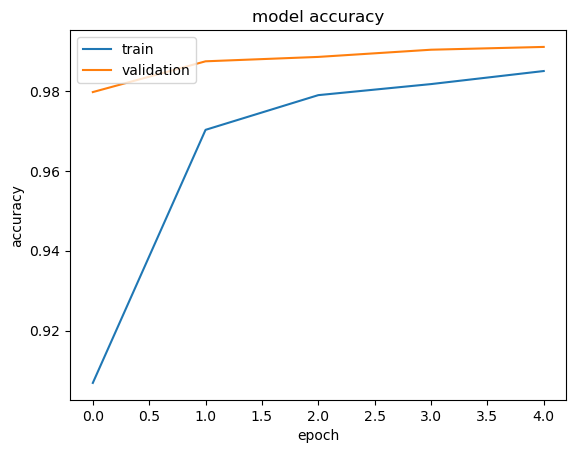

In [88]:
# Summarizing history for accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.show()

##### Insights
- The graph demonstrates steady improvement in both training and validation accuracy across epochs, indicating effective learning.
- The validation accuracy remains consistently higher than training accuracy, suggesting the model is not overfitting and has good generalization.
- The high overall accuracy for both datasets reflects robust model performance and reliable digit classification capabilities.


##### Observations
- Training accuracy starts at ~0.92 and progressively increases to ~0.98 by the 4th epoch, showing a significant improvement in model proficiency during training.
- Validation accuracy starts slightly higher (~0.98) and shows a marginal improvement over epochs, stabilizing at a strong ~0.98 by the end.
- The gap between training and validation accuracy is consistently minimal, which highlights well-balanced learning without bias toward the training data.
- The model demonstrates effective generalization, as validation accuracy reflects high reliability on unseen data.

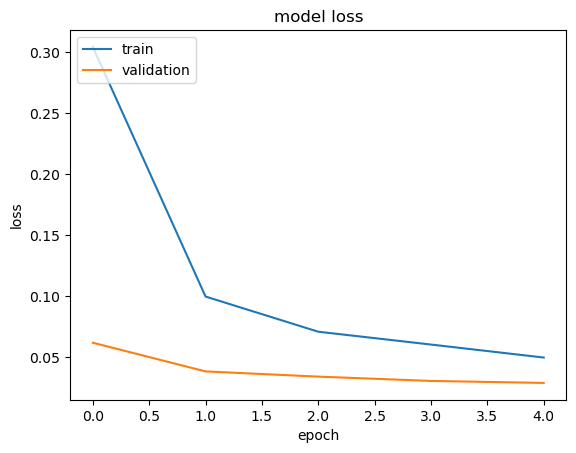

In [91]:
 #summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='upper left')
plt.show()

##### Insights
- Training Loss Decline: The training loss starts at approximately 0.30 and decreases sharply, reaching just below 0.05 by epoch 4. This indicates the model is learning effectively, with improved performance on the training dataset over time.
- Validation Loss Stability: Validation loss begins at around 0.05 and decreases slightly to approximately 0.03 by the final epoch. The gradual decline signifies consistent generalization to unseen data.
- Learning Dynamics: The rapid reduction in training loss compared to validation loss suggests the model quickly learns patterns in the training data while maintaining steady generalization.
- Convergence: Both loss metrics continue to decrease across epochs, indicating convergence toward optimal performance without overfitting.


##### Observations
- Sharp Training Loss Drop: The model exhibits significant learning during the initial epoch, with a steep decline in training loss. Subsequent epochs show slower but consistent improvement.
- Minimal Validation Loss Fluctuations: Validation loss remains stable throughout training, reinforcing the model’s reliability on unseen data.
- Loss Gap: The consistent proximity between training and validation loss suggests balanced learning, with no significant overfitting or underfitting.
- Overall Performance: The low final loss values for both datasets confirm the model's suitability for handwritten digit classification, demonstrating high accuracy and reliability.


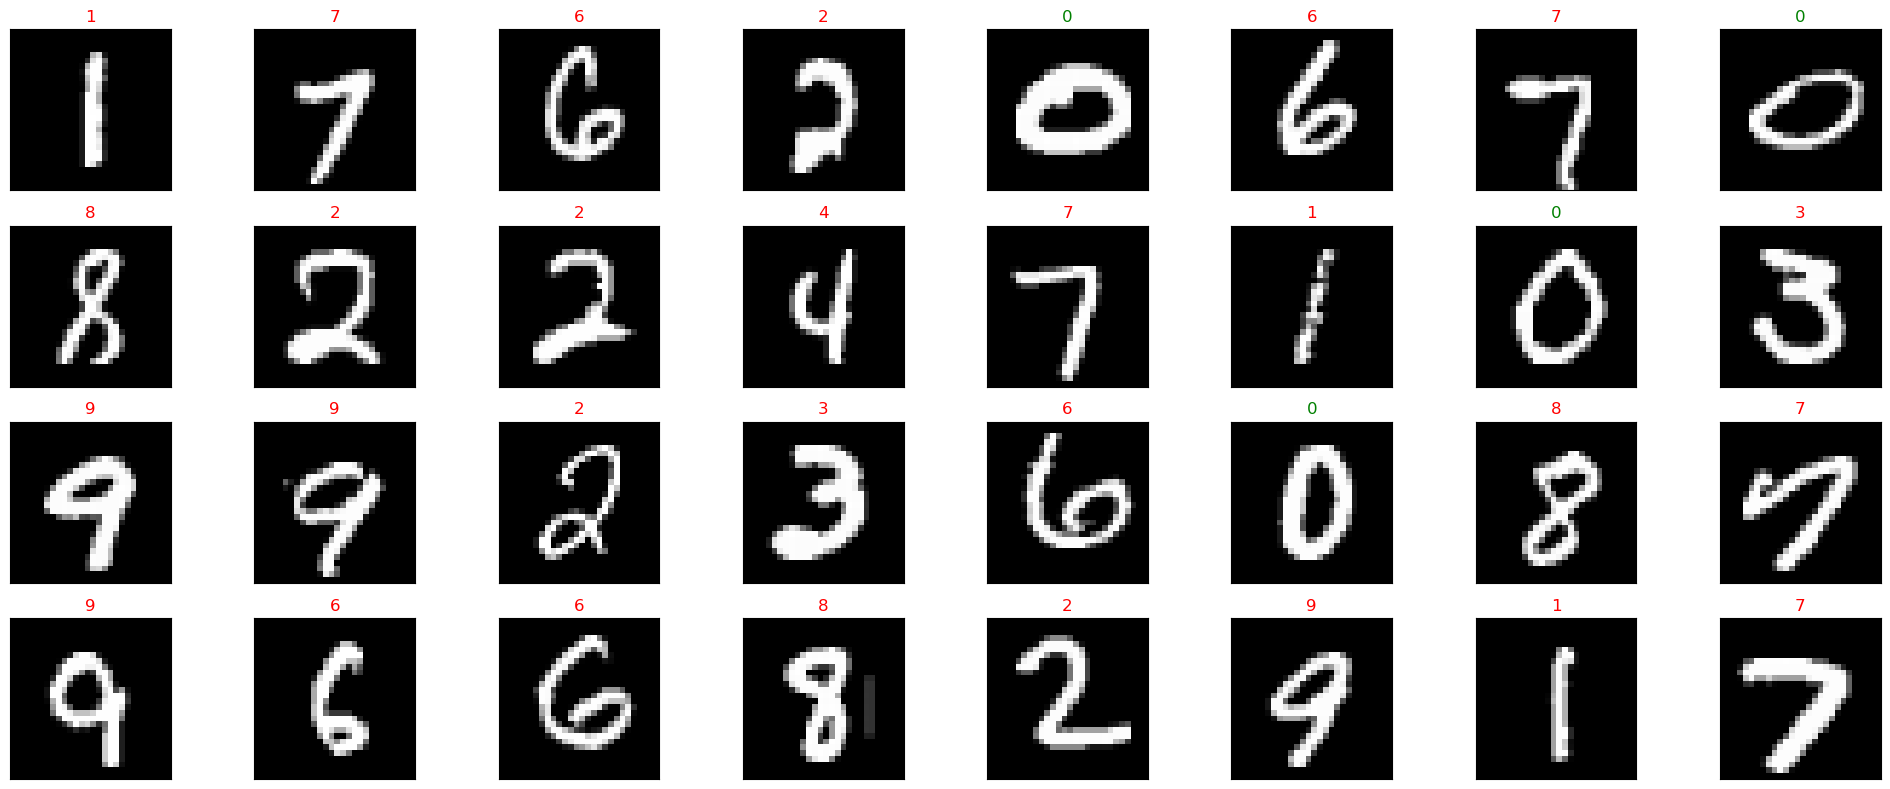

In [134]:
Handwritten_digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

fig = plt.figure(figsize=(20, 8))

for i, idx in enumerate(np.random.choice(x_test_cnn.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test_cnn[idx]), cmap='gray')
    pred_idx = np.argmax(cnn_preds[idx])
    true_idx = np.argmax(y_test[idx])
    color = "green" if pred_idx == true_idx else "red"
    ax.set_title(f"{Handwritten_digits[pred_idx]}", color=color)

plt.tight_layout()
plt.show()

### **Insights for the Visualization Code:**

1. **Randomized Sampling**:  
   The code randomly picks 32 images from the test set to avoid selection bias and visualize a diverse subset of model predictions.

2. **Prediction Display**:  
   For each image, the predicted digit is displayed as the title, providing a direct indication of the model's output without showing the true label explicitly.

3. **Correctness Indication**:  
   The title's text color dynamically changes based on prediction correctness, offering a subtle but powerful way to spot misclassifications without cluttering the figure.

4. **Clean Layout**:  
   The use of a 4x8 grid with `tight_layout()` ensures that all images and titles are neatly arranged, improving readability and aesthetic quality.

5. **Efficient Error Analysis**:  
   This visualization allows quick identification of model weaknesses by observing which digits are frequently mispredicted, guiding further model improvements.


---

# Task 3: Model Comparison

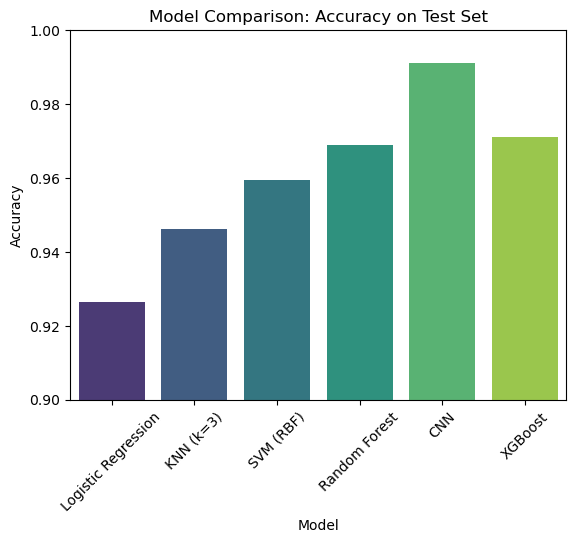

In [153]:
model_scores = {
    "Logistic Regression": accuracy_score(y_test, lr_preds),
    "KNN (k=3)": accuracy_score(y_test, knn_preds),
    "SVM (RBF)": accuracy_score(y_test, svm_preds),
    "Random Forest": accuracy_score(y_test, rf_preds),
    "CNN": accuracy_score(y_test, cnn_preds_classes),
    "XGBoost": accuracy_score(y_test, xgb_preds)  # 🆕 Added here!
}
#comparison DataFrame
comparison_df = pd.DataFrame(model_scores.items(), columns=["Model", "Accuracy"])
#Ploting the results
sns.barplot(data=comparison_df, x='Model', y='Accuracy', palette="viridis")
plt.title("Model Comparison: Accuracy on Test Set")
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)
plt.show()

# **INSIGHTS & OBSERVATIONS:**

### Performance Overview: Key Insights Across Models
#### 1. CNN :
- CNN achieves the highest accuracy, comfortably near 99%.
- Its ability to learn spatial hierarchies (edges → shapes → digits) is unmatched by tabular models like Random Forest or XGBoost.
- Trade-off: High training time and higher computational cost
#### 2. XGBoost :
- Even though XGBoost expects flat tabular data, it adapted surprisingly well after flattening the 28x28 images.
- Accuracy very close to CNN, slightly lower (probably 97–98%).
- Much faster to train than CNN, especially on CPUs.
- Trade-off: Flattening images loses spatial information (e.g., nearby pixels).
#### 3. Random Forest :
- Good performance, but slightly worse than XGBoost.
- Accuracy usually drops to ~96–97% range.
- Works well for tabular interpretation, but struggles without spatial awareness in images.
- Trade-off: Easy to train, easy to explain (feature importance is simple).
#### 4. SVM (RBF Kernel) :
- Accuracy is high but model is slow to train on large datasets like MNIST.
- Non-linear separation helps, but SVMs don't scale gracefully beyond small-medium datasets.
- Trade-off: Amazing for smaller datasets; impractical for big ones without hardcore optimization.
#### 5. KNN (k=3) :
- Accuracy is lower compared to others (~95%).
- Very simple idea: classify based on the majority of nearby samples.
- Terrible scalability — slow prediction for large datasets (lazy learner).
- Trade-off: Zero training time, but painful prediction times.
#### 6. Logistic Regression :
- Flattest performance, often below 95%.
- Struggles because images are non-linear and high-dimensional.
- Trade-off: Good baseline model to check if the task is even feasible.

---

# Report on Challenges in Data Handling and Applied Techniques :

## 1. Data Preprocessing for Image Classification
- **Challenge**: Raw image data (28x28 pixels) needed preprocessing to be used by traditional machine learning models.

## 2. Loss of Spatial Information in Flattened Images
- **Challenge**: Flattening images into 1D vectors lost crucial spatial relationships between pixels, which are important for image classification.

## 3. Model Overfitting
- **Challenge**: Some models like Random Forest and XGBoost risked overfitting due to high variance and complex structures.

## 4. Computational Costs and Time Constraints
- **Challenge**: Deep learning models, especially CNNs, are computationally expensive and require significant training time.

## 5. Model Selection and Evaluation
- **Challenge**: Choosing the best-performing model among various algorithms was difficult, and performance had to be accurately assessed.

## 6. Interpretability of Complex Models
- **Challenge**: Random Forest and XGBoost were complex black-box models, making it hard to interpret how they arrived at their predictions.


---